In [39]:
import tensorflow as tf
import numpy as np

## tf.nn.conv2d()
input:需要做卷积的输入数据
fliter:卷积核
strides：图像每一维的步长
padding：定义元素边框与元素内容之间的空间“SAME”或者“VALID”，当SAME时为边缘填充，当VALID时为边缘不填充
use_cudnn_on_gpu：bool类型，是否使用GPU加速。
name:该操作的名称
返回值：返回一个张量tensor 即feature map

In [40]:
input_data = tf.Variable(np.random.rand(10,9,9,4),dtype=np.float32)
filter_data = tf.Variable(np.random.rand(3,3,4,2),dtype= np.float32)
y=tf.nn.conv2d(input_data,filter_data,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True)
#y=tf.nn.conv2d(input_data,filter_data,strides=[1,1,1,1],padding='SAME',use_cudnn_on_gpu=True)
print(input_data)
print(y)

<tf.Variable 'Variable:0' shape=(10, 9, 9, 4) dtype=float32_ref>
Tensor("Conv2D:0", shape=(10, 7, 7, 2), dtype=float32)


## 池化函数
最大池化：tf.nn.max_pool(value,ksize,strides,padding,name=None)
平均池化：tf.nn.avg_pool(value,ksize,strides,padding,name=None)
value:需要池化的输入，一般池化层接在卷积层的后面，所以输入通常是conv2d
ksize：池化窗口的大小，一般不在batch和channel上做池化，所以ksize一般是[1,height,width,1]
strides:图像每一维的步长，是一个一维向量，长度为4
padding：定义元素边框与元素内容之间的空间“SAME”或者“VALID”，当SAME时为边缘填充，当VALID时为边缘不填充
name:该操作的名称
返回值：tensor

In [41]:
input_data = tf.Variable(np.random.rand(10,6,6,4),dtype=np.float32)
filter_data = tf.Variable(np.random.rand(2,2,4,2),dtype= np.float32)
y=tf.nn.conv2d(input_data,filter_data,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True)
#output=tf.nn.max_pool(value=y,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
output=tf.nn.avg_pool(value=y,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
print("conv:",y)
print('pool_pandding_valid:',output)

conv: Tensor("Conv2D_1:0", shape=(10, 5, 5, 2), dtype=float32)
pool_pandding_valid: Tensor("AvgPool:0", shape=(10, 3, 3, 2), dtype=float32)


# CIFAR_10数据集
是一个用于识别普适物体的小数据集，它包含了10个类别的RGB彩色图片

In [42]:
import urllib.request
import os
import tarfile
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
filepath='data/cifar-10-python.tar.gz'
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath)
    print('download:',result)
else:
    print('data file alreay exists:')
if not os.path.exists("data/cifar-10-batches-py"):
    tfile = tarfile.open("data/cifar-10-python.tar.gz",'r:gz')
    result = tfile.extractall('data/')
    print("Extracted")
else :
    print('directory already.')

data file alreay exists:
directory already.


 ## 导入数据

In [43]:
import os 
import numpy as np
import pickle as p
def load_CIFAR_batch(filename):
    with open(filename,'rb')as f:
        #一个样本又标签和图像组成
        data_dict=p.load(f,encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
        #把原始数据结构调成为：BCWH
        images = images.reshape(10000,3,32,32)
        #把通道数据C移动到最后一个维度
        images = images.transpose(0,2,3,1)
        labels = np.array(labels)
        
        return images,labels
def load_CIFAR_data(data_dir):
    images_train=[]
    labels_train=[]
    for i in range(5):
        f=os.path.join(data_dir,'data_batch_%d'%(i+1))
        print('loading',f)
        #调用load——CIFAR_batch()获得批量的图像及其对应的标签
        image_batch,label_batch=load_CIFAR_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        Xtrain=np.concatenate(images_train)
        Ytrain=np.concatenate(labels_train)
        del image_batch,label_batch
    
    Xtest,Ytest=load_CIFAR_batch(os.path.join(data_dir,'test_batch'))
    print('finished loadding CIFAR-10 data')
    
    #返回训练集的图像和标签，测试集的图像和标签
    return Xtrain,Ytrain,Xtest,Ytest
data_dir='data/cifar-10-batches-py/'
Xtrain,Ytrain,Xtest,Ytest = load_CIFAR_data(data_dir)

loading data/cifar-10-batches-py/data_batch_1
loading data/cifar-10-batches-py/data_batch_2
loading data/cifar-10-batches-py/data_batch_3
loading data/cifar-10-batches-py/data_batch_4
loading data/cifar-10-batches-py/data_batch_5
finished loadding CIFAR-10 data


## 显示数据集信息

In [44]:
print('training data shape',Xtrain.shape)
print('training labels shape',Ytrain.shape)
print('test data shape',Xtest.shape)
print('test labels shape',Ytest.shape)

training data shape (50000, 32, 32, 3)
training labels shape (50000,)
test data shape (10000, 32, 32, 3)
test labels shape (10000,)


## 查看单项image和label

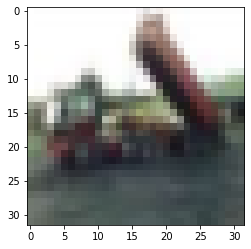

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
#查看image
plt.imshow(Xtrain[2])

In [46]:
#查看label
#对应类别信息是查看:http://www.cs.toronto.edu/~kriz/cifar.html
print(Ytrain[2])

9


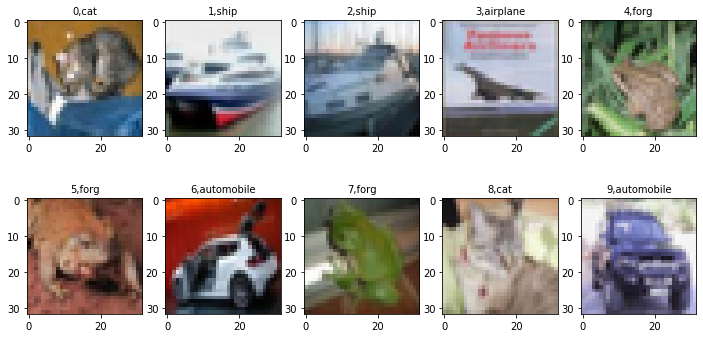

In [47]:
#定义标签字典，采用独热编码的形式
label_dict = {0:"airplane",1:"automobile",2:"brid",3:"cat",4:"deer",5:"dog",6:"forg"
             ,7:"horse",8:"ship",9:"truck"}
#定义显示图像数据及其对应标签的函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,6)
    if num>10:
        num=10
    for i in range(0,num):
        ax=plt.subplot(2,5,1+i)
        ax.imshow(images[idx],cmap="binary")
        
        title=str(i)+','+label_dict[labels[idx]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10)
        
        idx +=1
    plt.show()
plot_images_labels_prediction(Xtest,Ytest,[],0,10)

## 对数据进行预处理

In [48]:
#查看图像数据信息
#显示第一个图的第一个像素点
Xtrain[0][0][0]

array([59, 62, 63], dtype=uint8)

In [68]:
#将图像进行数字标准化
Xtrain_normalize = Xtrain.astype("float32")/255.0
Xtest_normalize = Xtest.astype("float32")/255.0

In [50]:
#查看预处理后图像数据信息
Xtrain_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

## 标签数据预处理

In [51]:
Ytrain[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])

### 独热编码 能够处理非连续型数值特征
#### 在一定程度上也扩充了特征

In [52]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

encoder.fit(yy)
Ytrain_reshape = Ytrain.reshape(-1,1)
Ytrain_onehot = encoder.transform(Ytrain_reshape)
Ytest_reshape = Ytest.reshape(-1,1)
Ytest_onehot = encoder.transform(Ytest_reshape)

C:\Users\zeus\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [53]:
Ytrain_onehot.shape

(50000, 10)

In [54]:
Ytrain[:5]

array([6, 9, 9, 4, 1])

In [55]:
Ytrain_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# 建立CIFAR-10图像分类模型

In [56]:
tf.reset_default_graph()

In [57]:
#定义权值
def weight(shape):
    #在构建模型时，需要使用tfVariavle来创建一个变量
    #在训练师，这个变量不断更新
    #使用函数tf.truncated_normal（截断正态分布）生成标准差为0.1的随机数来初始化权重
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1,name='W'))

#定义偏置b
#初始化为0.1
def bias(shape):
    return tf.Variable(tf.constant(0.1,shape=shape),name='b')
#定义卷积操作
#步长为1,padding为'SAME'
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding= 'SAME',use_cudnn_on_gpu=True)
#定义池化操作
#步长为2 即原始尺寸的长和宽除以2
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


# 定义网络结构

In [58]:
#输入层
#32*32图像，通道为3（RGB）
with tf.name_scope('input_layer'):
    x = tf.placeholder('float',shape=[None,32,32,3],name="x")
#第一个卷积层
#输入通道：3，输出通道：32，卷积后图像尺寸不变，依然是32*32
with tf.name_scope('conv_1'):
    W1=weight([3,3,3,32])#[k_width,k_height,input_chn,output_chn]
    b1=bias([32])#与putput_chn一致
    conv_1=conv2d(x,W1)+b1
    conv_1=tf.nn.relu(conv_1)
#第一个池化层
with tf.name_scope('pool_1'):
    pool_1=max_pool_2x2(conv_1)
#第二个卷积层
with tf.name_scope('conv_2'):
    W2=weight([3,3,32,64])#[k_width,k_height,input_chn,output_chn]
    b2=bias([64])#与putput_chn一致
    conv_2=conv2d(pool_1,W2)+b2
    conv_2=tf.nn.relu(conv_2)
#第二个池化层
with tf.name_scope('pool_2'):
    pool_2=max_pool_2x2(conv_2)
#全连接层
#将第二个池化层的64个8x8的图像转换为一维的向量，长度是64*8*8=4096
#128个神经元
with tf.name_scope('fc'):
    W3=weight([4096,128])#共有128个神经元
    b3=bias([128])
    flat = tf.reshape(pool_2,[-1,4096])
    h = tf.nn.relu(tf.matmul(flat,W3)+b3)
    h_dropout= tf.nn.dropout(h,keep_prob=0.8) #避免过拟合
#输出层
#输出层共有10个神经元
with tf.name_scope('output_layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    pred = tf.nn.softmax(tf.matmul(h_dropout,W4)+b4)

# 构建模型

In [59]:
with tf.name_scope("optimizer"):
    #定义占位符
    y=tf.placeholder("float",shape=[None,10],
                     name="label")
    #定义损失函数
    loss_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
    #选择优化器
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)\
    .minimize(loss_function)

# 定义准确率

In [60]:
with tf.name_scope("evaluation"):
    correct_prediction = tf.equal(tf.argmax(pred,1),
                                 tf.arg_max(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 训练模型

## 启动会话

In [61]:
from time import time 
train_epochs = 5
batch_size = 50
total_batch = int(len(Xtrain)/batch_size)
epoch_list =[];accuracy_list =[];loss_list=[];
epoch=tf.Variable(0,name='epoch',trainable=False)

startTime=time()
sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

## 断电续训

In [62]:
#设置检查点存储目录
ckpt_dir="CIFAR10_log/"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)
#生成saver
saver = tf.train.Saver(max_to_keep=1)
#如果有检查点文件，读取最新的检查点文件，恢复各种变量值
ckpt = tf.train.latest_checkpoint(ckpt_dir)
if ckpt!=None:
    saver.restore(sess,ckpt)#加载所有的参数
    #从这里开始就可以直接使用模型进行预测，或者接着继续训练了
else :
    print("Trainning from scratch.")
#获取续训参数
start =sess.run(epoch)
print("training starts form {} epoch.".format(start+1))

INFO:tensorflow:Restoring parameters from CIFAR10_log/CIFAR10_cnn_model.cpkt-5
training starts form 15 epoch.


## 迭代训练

In [63]:
def get_train_batch(number,batch_size):
    return Xtrain_normalize[number*batch_size:(number+1)*batch_size],\
            Ytrain_onehot[number*batch_size:(number+1)*batch_size]
for ep in range(start,train_epochs):
    for i in range (total_batch):
        batch_x,batch_y =get_train_batch(i,batch_size)
        sess.run(optimizer,feed_dict={x:batch_x,y:batch_y})
        if i%100==0:
            print("step {} ".format(i),"finished")
    loss,acc= sess.run([loss_function,accuracy],feed_dict={x:batch_x,y:batch_y})
    epoch_list.append(ep+1)
    loss_list.append(loss)
    accuracy_list.append(acc)
    
    print("Train epoch:",'%02d'%(sess.run(epoch)+1),\
            "loss=","{:.6f}".format(loss),"Accuracy=",acc)
    #保存检查点
    saver.save(sess,ckpt_dir+"CIFAR10_cnn_model.cpkt",global_step=ep+1)
    sess.run(epoch.assign(ep+1))
    
duration = time()-startTime
print("Train finished takes:",duration)

Train finished takes: 0.2578125


### 改进方式 增加网络层数 增加迭代次数 增加全连接层数 增加全连接层的神经元的个数 数据扩增等

## 可视化损失值

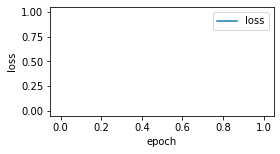

In [64]:
%matplotlib inline 

fig =plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label="loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper right')

## 可视化准确率

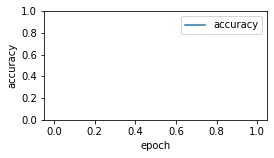

In [65]:
plt.plot (epoch_list,accuracy_list,label="accuracy")
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0,1,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 模型评估及预测

## 计算测试集上的准确率

In [69]:
test_total_batch = int(len(Xtest_normalize)/batch_size)
test_acc_sum=0.0
for i in range(test_total_batch):
    test_image_batch=Xtest_normalize[i*batch_size:(i+1)*batch_size]
    test_label_batch=Ytest_onehot[i*batch_size:(i+1)*batch_size]
    test_batch_acc=sess.run(accuracy,feed_dict={x:test_image_batch,y:test_label_batch})
    test_acc_sum += test_batch_acc
test_acc = float(test_acc_sum/test_total_batch)
print("Test accuracy:{:.6f}".format(test_acc))

Test accuracy:0.453800


### 利用模型进行预测

In [76]:
test_pred=sess.run(pred,feed_dict={x:Xtest_normalize[:10]})
prediction_result=sess.run(tf.arg_max(test_pred,1))

### 可视化预测结果

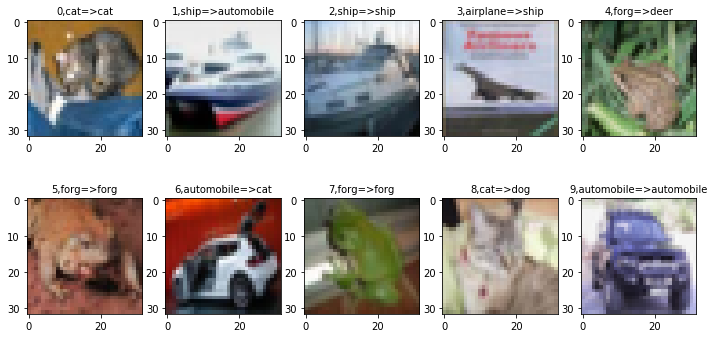

In [79]:
plot_images_labels_prediction(Xtest,Ytest,prediction_result,0,10)